# **HW1: Regression** 
In *assignment 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict the number of dengue cases


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict the number of dengue cases in a different way than the basic part

# 1. Basic Part (60%)
In the first part, you need to implement the regression to predict the number of dengue cases

Please save the prediction result in a csv file **hw1_basic.csv**


## Import Packages

> Note: You **cannot** import any other package in the basic part

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

## Global attributes
Define the global attributes

In [300]:
input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
output_dataroot = 'hw1_basic.csv' # Output file will be named as 'hw1_basic.csv'

input_datalist =  [] # Initial datalist, saved as numpy array
output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
             # The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']

You can add your own global attributes here


In [301]:
training_datalist = []
validation_datalist = []

prediction_datalist = []

## Load the Input File
First, load the basic input file **hw1_basic_input.csv**

Input data would be stored in *input_datalist*

In [302]:
# Read input csv to datalist
with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))


In [303]:
df = pd.read_csv(input_dataroot)
#print(df.dtypes)


## Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions


### Step 1: Split Data
Split data in *input_datalist* into training dataset and validation dataset 



In [304]:
#Fill in missing values NaN with median of each city
def PreprocessData():
    df['TemperatureA'] = df['TemperatureA'].replace(np.NaN, df["TemperatureA"].median())
    df['TemperatureB'] = df['TemperatureB'].replace(np.NaN, df["TemperatureB"].median())
    df['TemperatureC'] = df['TemperatureC'].replace(np.NaN, df["TemperatureC"].median())

    name = ['TemperatureA', 'TemperatureB', 'TemperatureC']
    #Replace Outlier with median of each city 
    for i in range(3):        
        df_sub = df[name[i]]
        iqr = df_sub.quantile(0.75)- df_sub.quantile(0.25)
        lim = np.abs((df_sub-df_sub.median())/ iqr) < 2.22
        df[name[i]] = df_sub.where(lim, df[name[i]].median())


In [305]:
# training_datalist = df[0:75]
# validation_datalist = df[75:94]
# prediction_datalist = df[94:105]

In [306]:
def SplitData():
  global training_datalist, validation_datalist, prediction_datalist
  training_datalist = df[0:75]
  validation_datalist = df[75:94]
  prediction_datalist = df[94:105]

In [307]:
PreprocessData()
SplitData()

In [308]:
# def PutInOutput(datalist):    
#     for i in datalist:
#         r = [i.epiweek, i.tempA, i.tempB, i.tempC, i.cityA, i.cityB, i.cityC]
#         output_datalist.append(r)


### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [309]:


# ys = 200 + np.random.randn(100)
# x = [x for x in range(len(ys))]

# plt.plot(x, ys, '.')
# plt.plot(x, ys, '-')
# #plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

# plt.title("Sample Visualization")
# plt.show()

In [310]:
# Scatterplot with plt.plot vs plt.scatter
# # Data
# x = np.linspace(0,5,20)
# y1 = np.sin(x)
# y2 = np.sin(x+1)

# # Plot
# plt.plot(x,y1,'o',color='blue', label='plt.plot')
# plt.scatter(x, y2, c=y2, label='plt.scatter', cmap='Reds')

# # Decorate
# plt.title('Scatterplot with plt.plot vs plt.scatter')
# plt.xlabel('x- VALUE')
# plt.ylabel(' sine function ')
# plt.legend(loc='upper right')
# plt.colorbar()
# plt.show()

In [311]:
# def PreprocessData():
#   return 0

### Step 3: Implement Regression
> Hint: You can use Matrix Inversion, or Gradient Descent to finish this part




In [312]:
# L = []
# def term(s, power):
#     for i in len(power):



In [313]:
abc = np.arange(6)
abc.reshape(3,2)
print(type(abc))
L = [1,3]
L = np.array(L)
print(type(L))
L


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([1, 3])

In [314]:
# print(type(training_datalist))
print(type(training_datalist.loc[3, "CityA"]))
print(type(training_datalist.loc[3]))
#training_datalist.dtypes

<class 'numpy.int64'>
<class 'pandas.core.series.Series'>


In [315]:
dummy = np.ones((5,7))
type(dummy)

numpy.ndarray

In [316]:
training_datalist.loc[3:,"CityA"].to_numpy()

array([180, 162, 127, 108,  99,  94,  67,  78,  70,  90,  84,  83,  78,
        76,  80,  79,  97,  93,  60,  62,  62,  45,  55,  61,  50,  44,
        59,  44,  38,  44,  44,  46,  39,  29,  44,  32,  49,  40,  46,
        48,  37,  48,  59,  49,  66,  43,  53,  41,  37,  52,  31,  31,
        24,  22,  31,  35,  34,  26,  41,  44,  23,  26,  27,  32,  29,
        44,  37,  43,  51,  48,  59,  55], dtype=int64)

In [317]:
Pday_num =3
Day_power = 3
L = np.zeros((75-Pday_num,Pday_num*Day_power+1))

for i in range(Pday_num, 75):
    #down the dataframe
    for j in range(0,Pday_num):
        #to add into ea row of X
        for k in range(0, Day_power):
            #for power
            L[i-Pday_num,j*Day_power+k] = (math.pow(training_datalist.loc[i-(j+1), "CityA"], k+1))
        L[i-Pday_num, Pday_num*Day_power] = 1

#print(L)
# [pow(x,i) for i,x in enumerate(list)]
print(type(L))
L_tranpose = L.transpose()
#y = training_datalist.loc[:,"CityA"]
y = training_datalist.loc[Pday_num:,'CityA'].to_numpy()

print(type(y))

C = np.dot(L_tranpose, L)
C = np.linalg.inv(C)
C = np.dot(C,L_tranpose)
C = np.dot(C,y)

print(type(C))
print(C)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 2.89253504e-01  7.47752321e-04  5.19230534e-06  4.87154064e-01
 -2.25770719e-03  3.51477286e-06  1.66786873e-01  6.00076545e-04
 -7.17112114e-06  4.41976906e+00]


In [318]:
def Regression():
    #c = inverse((Xt*X))*Xt*y_predicted
    #create X
    pday1, pday2, pday3 = 0
    temp = 0

    Pday1 = pday1**3 + pday1**2 + pday1**1  
    Pday2 = pday2**3 + pday2**2 + pday2**1
    Pday3 = pday3**3 + pday3**2 + pday3**1
    Temp = temp**3 + temp**2 + temp**1
    Beta = 1
    


### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [319]:
y_predict = np.dot(L,C)

In [320]:
def MakePrediction(): 
  return 0

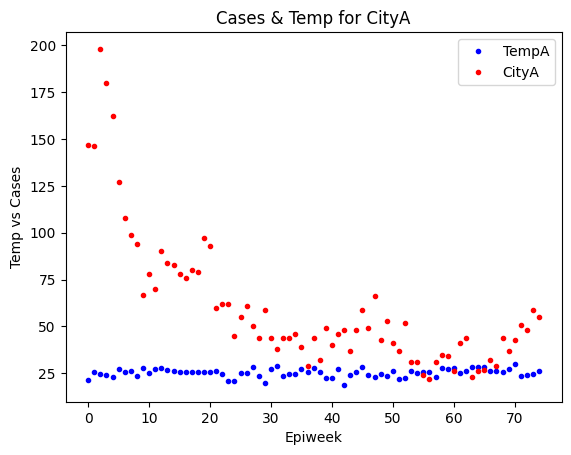

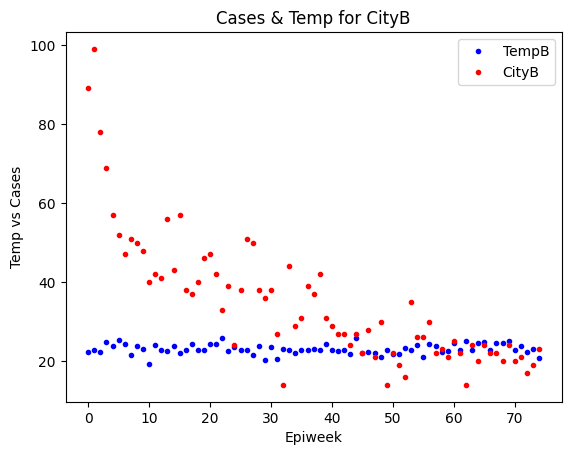

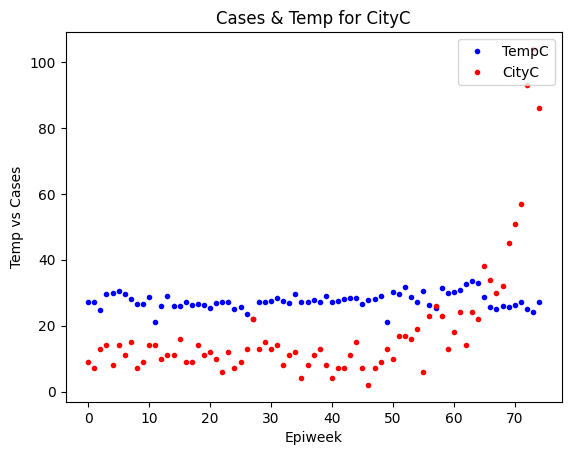

In [321]:
#CityA
x = training_datalist.index
y1 = training_datalist['TemperatureA']
y2 = training_datalist['CityA']
plt.plot(x,y1,'.', color='blue', label='TempA')
plt.plot(x,y2,'.', color='red', label='CityA')

plt.title('Cases & Temp for CityA')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()

#CityB
x = training_datalist.index
y1 = training_datalist['TemperatureB']
y2 = training_datalist['CityB']
plt.plot(x,y1,'.', color='blue', label='TempB')
plt.plot(x,y2,'.', color='red', label='CityB')

plt.title('Cases & Temp for CityB')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()

#CityC
x = training_datalist.index
y1 = training_datalist['TemperatureC']
y2 = training_datalist['CityC']
plt.plot(x,y1,'.', color='blue', label='TempC')
plt.plot(x,y2,'.', color='red', label='CityC')

plt.title('Cases & Temp for CityC')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()



In [322]:
np.arange(5)


array([0, 1, 2, 3, 4])

In [323]:
print(training_datalist.index)
type(y_predict)
np.array([1,8])

RangeIndex(start=0, stop=75, step=1)


array([1, 8])

In [324]:
len(y_predict)
x2 = np.arange(Pday_num, Pday_num+len(y_predict))

print(x2)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]


[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]


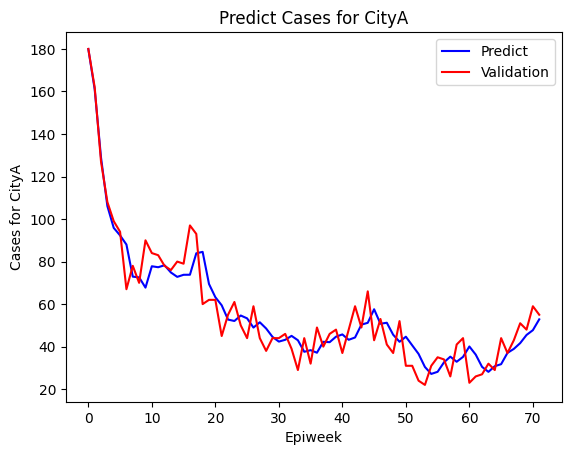

In [325]:
#Validation Set

x1 = np.arange(len(y_predict))

print(x2)
y1 = y_predict
# y2 = training_datalist.iloc[3:75, 4]
y2 = training_datalist.iloc[Pday_num:len(training_datalist), 4]

plt.plot(x1,y1,'-', color='blue', label='Predict')
plt.plot(x1,y2,'-', color='red', label='Validation')

plt.title('Predict Cases for CityA')
plt.xlabel('Epiweek')
plt.ylabel('Cases for CityA')
plt.legend(loc='upper right')
plt.show()


In [326]:
y_predict[2]

128.8984024052524

In [327]:
training_datalist.iloc[3, 4]

180

In [328]:
#Generate MAPE
def Mape(Y_Actual, Y_Predicted):
    mape = np.mean(np.abs( (Y_Actual - Y_Predicted)/Y_Actual ))
    return mape

In [330]:
def Calculate(Y_Actual, Y_Predicted, City_num):
    sum = 0
    for i in range(len(y_predict)):
        #put in ea indvidual value
        # sum += Mape(training_datalist.iloc[Pday_num+i, 4], y_predict[i])
        sum += Mape(Y_Actual.iloc[Pday_num+i, City_num], Y_Predicted[i])

    sum = (sum*100)/len(y_predict)
    print(sum)

In [298]:
Calculate(training_datalist, y_predict, 4)

16.50191113689253


### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be: 
```
3 2 1
```





In [331]:
print(C)

[ 2.89253504e-01  7.47752321e-04  5.19230534e-06  4.87154064e-01
 -2.25770719e-03  3.51477286e-06  1.66786873e-01  6.00076545e-04
 -7.17112114e-06  4.41976906e+00]


## Write the Output File
Write the prediction to output csv
> Format: 'epiweek', 'CityA', 'CityB', 'CityC'

In [ ]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

PermissionError: [Errno 13] Permission denied: 'hw1_basic.csv'

# 2. Advanced Part (35%)
In the second part, you need to implement the regression in a different way than the basic part to help your predictions for the number of dengue cases

We provide you with two files **hw1_advanced_input1.csv** and **hw1_advanced_input2.csv** that can help you in this part

Please save the prediction result in a csv file **hw1_advanced.csv** 


# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered 
*   Summarize your work and your reflections 
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)